<a href="https://colab.research.google.com/github/iron59zug/YFapi/blob/master/plot_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#to do:
"""
1. add BoS scatters to plt
2. calc expected BoS from given RSI
"""

# libs
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

#data
stox='ackb.BR'
sdate='2008-06-30'

#calculation
days=14 #RSI
STs=28; LTs=250 #EMA

#layout
fs=28; #font size
fsx=36; fsy=9 #figure size, x=width and y=heigth
# idea: fsxy= figsize=($fsx,$fsy)
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)
plt.style.use('fivethirtyeight')

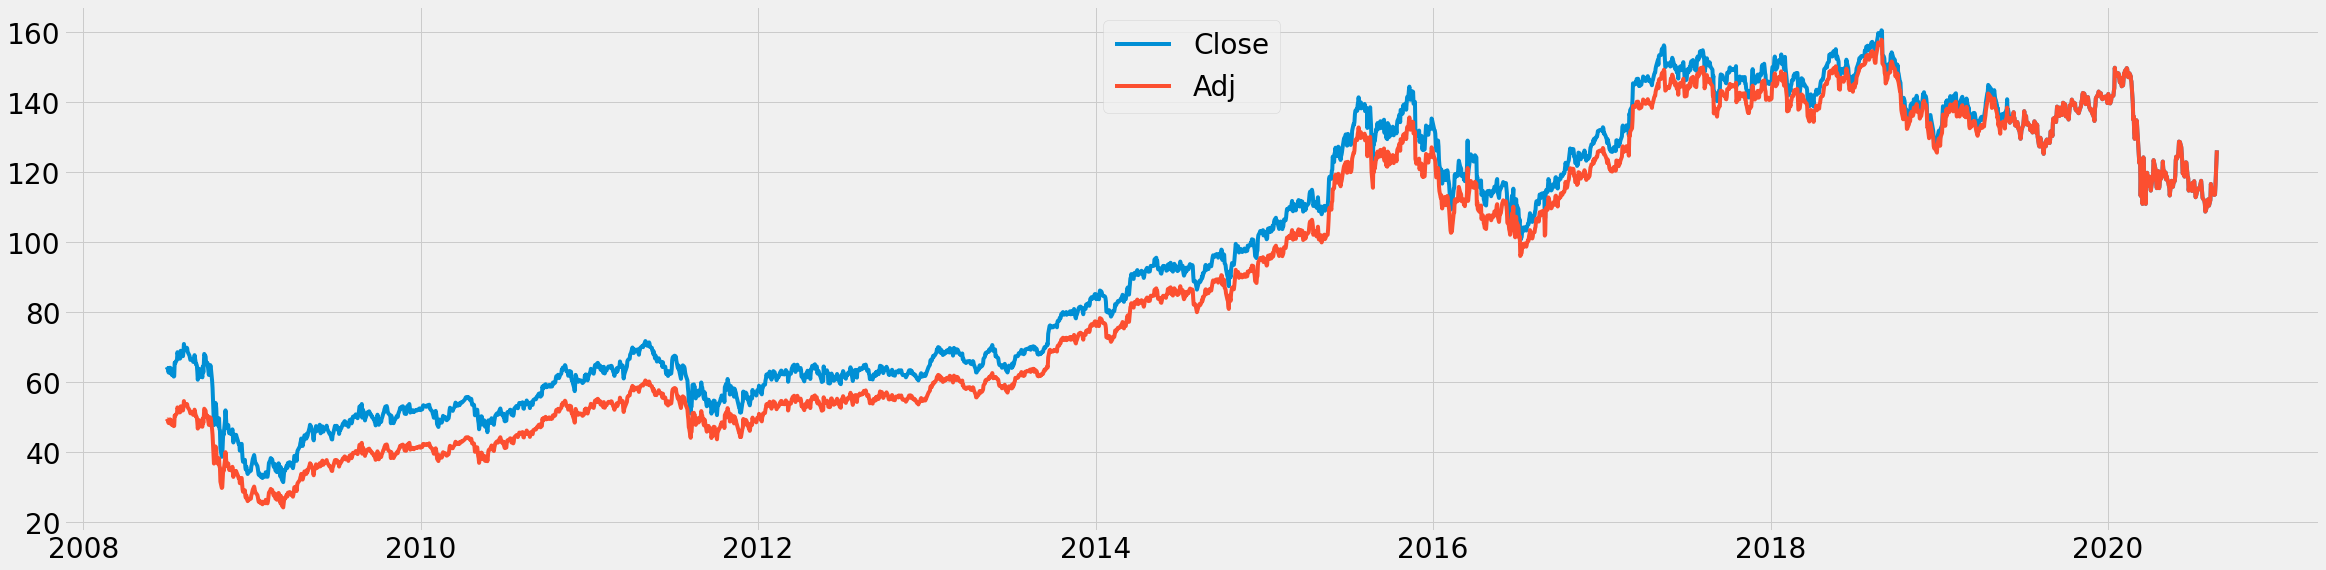

In [18]:
# data prep
df = pdr.DataReader(stox, data_source='yahoo',start=sdate)
df.rename(columns={'Close':'c', 'Adj Close':'ac'}, inplace=True)
#df.shape
SEMA = df.ac.ewm(span=STs, adjust=False).mean()
LEMA = df.ac.ewm(span=LTs, adjust=False).mean()
df['sema'] = SEMA; df['lema'] = LEMA

plt.figure(figsize=(fsx, fsy))
plt.plot(df['c'], label='Close')
plt.plot(df['ac'], label='Adj')

#ax.set_xticklabels(x_ticks, rotation=0, fontsize=fs)
#plt.xlabel('date', fontsize=fs); plt.ylabel('€')
plt.legend(loc='upper center', fontsize=fs); plt.show()
#df.tail(5)

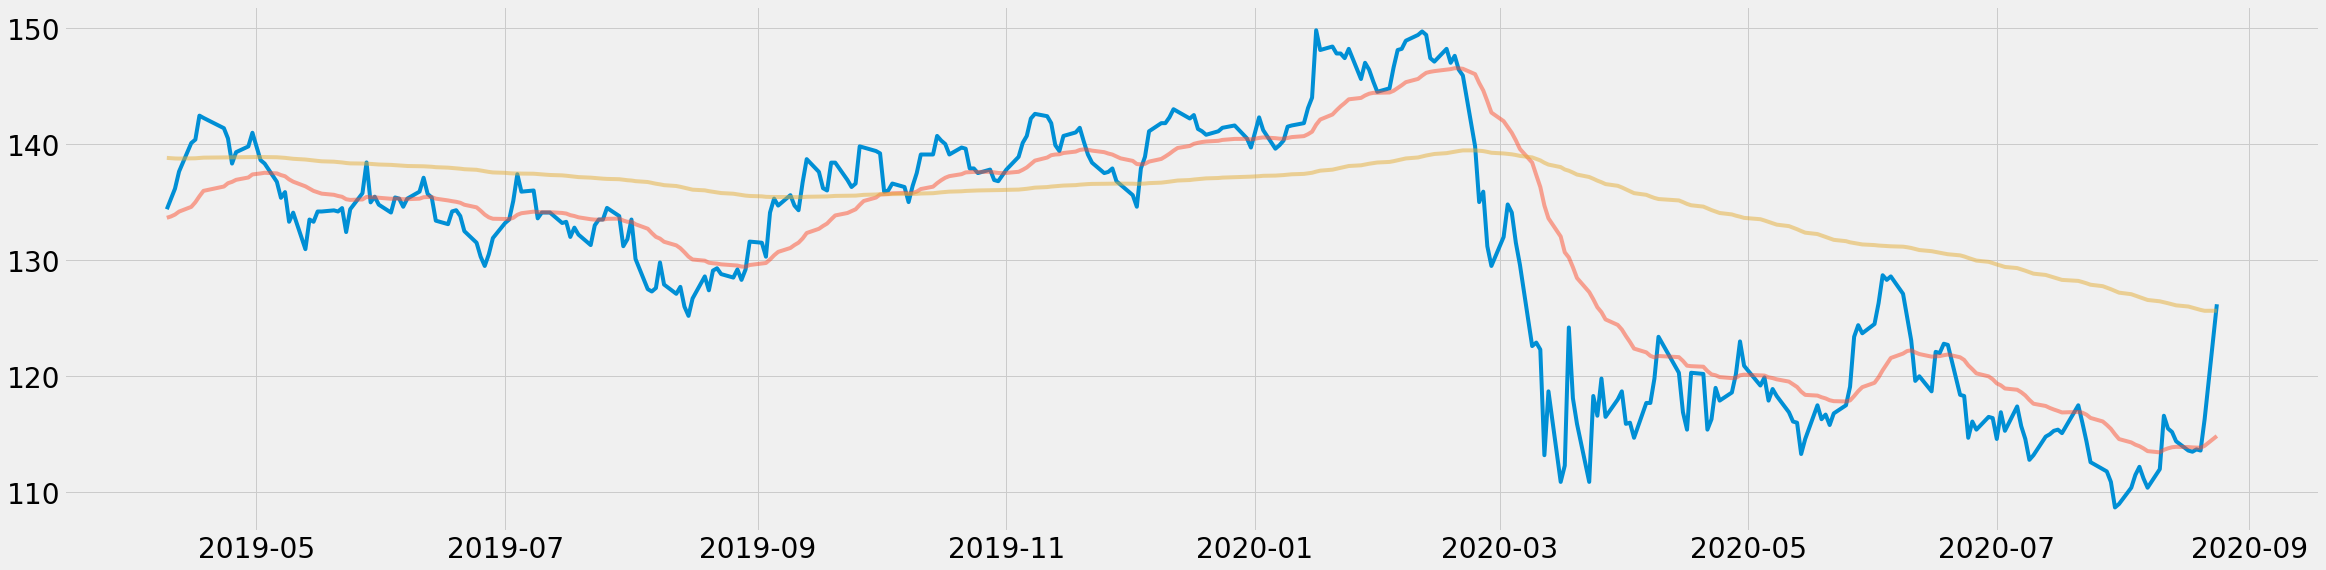

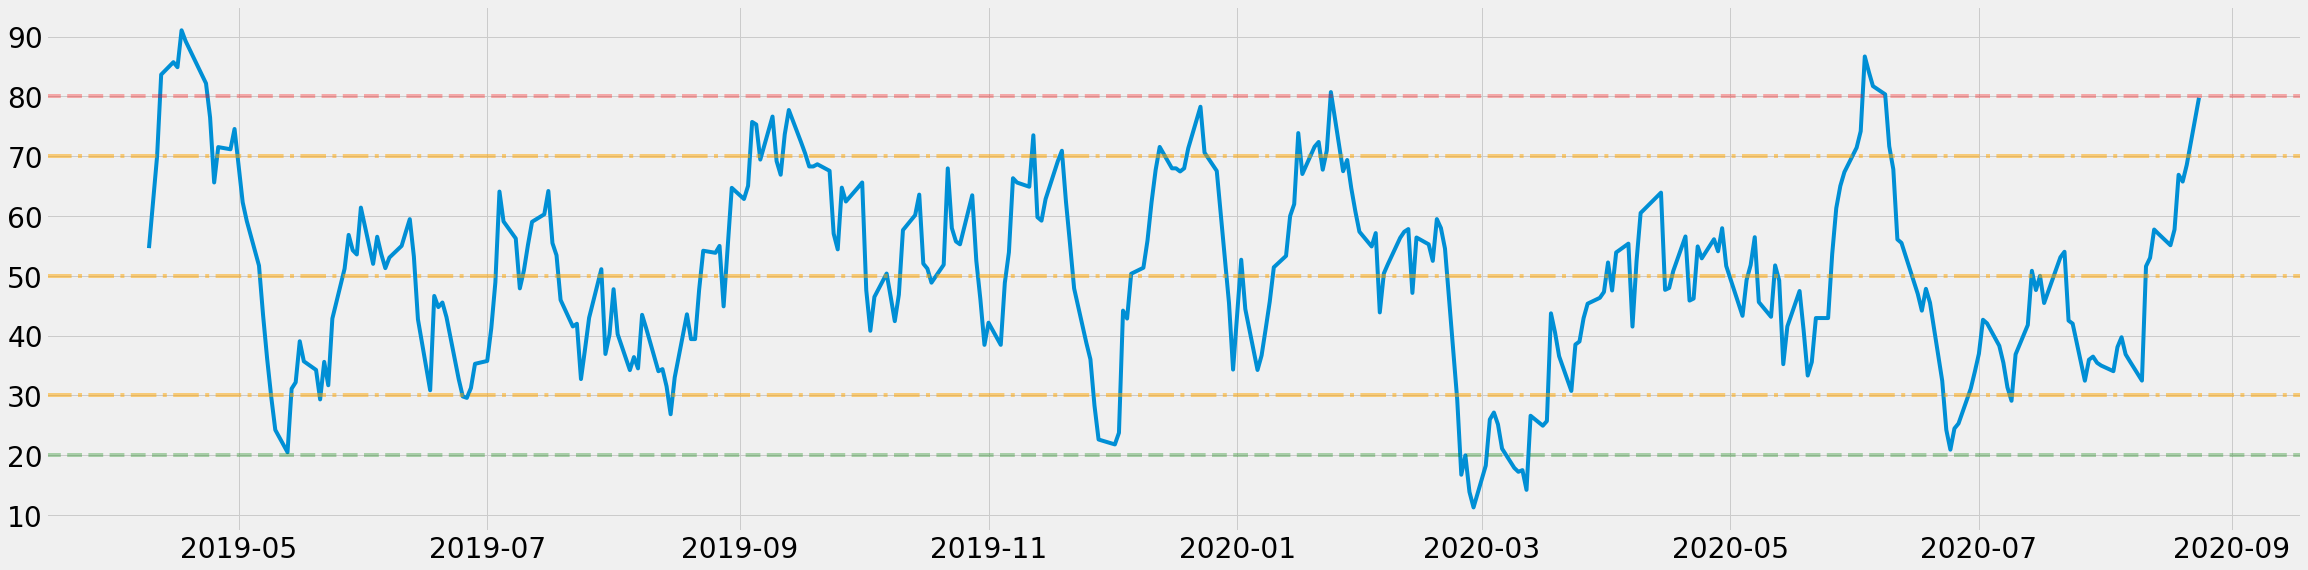

In [19]:
# RSI calc
pd1 = df['ac'].diff(1).dropna()
#pd1
gain = pd1.copy(); loss = pd1.copy()
gain[gain<0] = 0; loss[loss>0] = 0
avgg = gain.rolling(window=days).mean()
avgl = abs(loss.rolling(window=days).mean())
rs = avgg/avgl; rsi = 100.00 - (100.00 / (1.00 + rs))

#plt.figure(figsize=(fsx, fsy))
#rsi.plot(); plt.show()
ndf = pd.DataFrame()
ndf['ac'] = df['ac']; ndf['rsi'] = rsi
ndf.dropna()
ndf = ndf[-350:]
SEMA = SEMA[-350:]
LEMA = LEMA[-350:]
plt.figure(figsize=(fsx, fsy))
plt.plot(ndf.index, ndf['ac'])
plt.plot(SEMA, label='SEMA', alpha=0.5)
plt.plot(LEMA, label='LEMA', alpha=0.5)
#plt.scatter
"""
plt.scatter(ct.index, ct['buy'], color='green', label='buy', marker='^', s=300)
plt.scatter(ct.index, ct['sell'], color='red', label='sell', marker='v', s=300)
"""
plt.show()
plt.figure(figsize=(fsx, fsy))
plt.plot(ndf.index, ndf['rsi'])
plt.axhline(80, linestyle='dashed', alpha=0.3, color='red')
plt.axhline(70, linestyle='dashdot', alpha=0.5, color='orange')
plt.axhline(50, linestyle='dashdot', alpha=0.5, color='orange')
plt.axhline(30, linestyle='dashdot', alpha=0.5, color='orange')
plt.axhline(20, linestyle='dashed', alpha=0.3, color='green')
plt.show()

In [13]:
ndf[-10:]

,ac,rsi
Date,,
2020-08-11,116.599998,51.595741
2020-08-12,115.500000,53.005461
2020-08-13,115.199997,57.738093
2020-08-14,114.400002,57.058831
2020-08-17,113.599998,55.113624
2020-08-18,113.500000,57.738093
2020-08-19,113.699997,66.891906
2020-08-20,113.599998,65.753438
2020-08-21,116.300003,68.553480


In [14]:
ndf

,ac,rsi
Date,,
2019-08-30,131.600006,64.705897
2019-09-02,131.500000,62.837832
2019-09-03,130.300003,65.034956
2019-09-04,134.100006,75.722543
2019-09-05,135.300003,75.294113
...,...,...
2020-08-18,113.500000,57.738093
2020-08-19,113.699997,66.891906
2020-08-20,113.599998,65.753438
